<a href="https://colab.research.google.com/github/Marcooos05/Algo-Trading-Journal/blob/main/Generic_LiveStockPrice_Analyis(SMA30%26SMA90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#Install yfinance for stock price data
#pip install yfinance --upgrade --no-cache-dir

In [81]:
#Importing relevant libraries for data visualization
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [82]:
import yfinance as yf

stocks = input("Please input ticker symbol: ") # AAPL, TSLA, AMD, NVDA, AMZN'

stock_data = yf.Ticker(stocks)

# get all stock info
stock_name = stock_data.info['longName']

Please input ticker symbol: ^GSPC


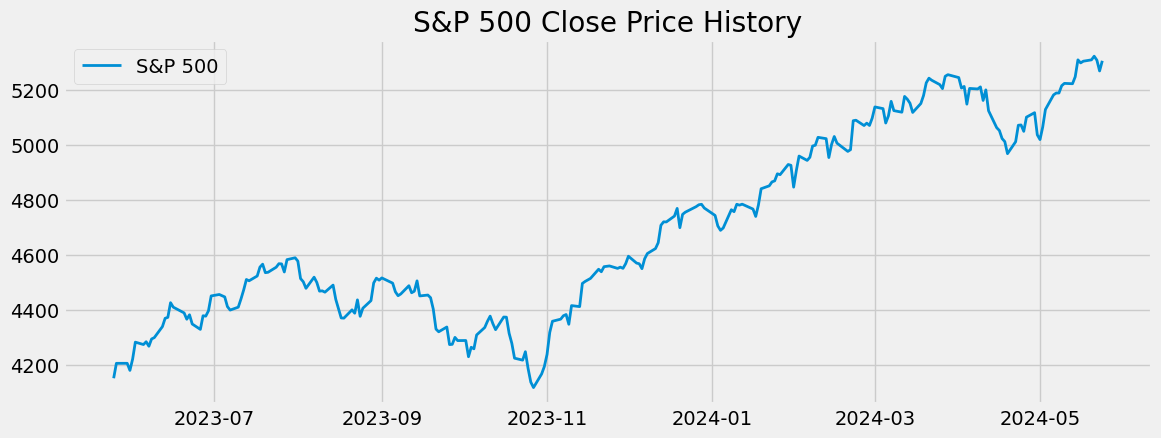

In [83]:
#Plotting of daily stock price data within the last year
hist_1y = stock_data.history(period="1y")
plt.figure(figsize = (12.5, 4.5))
plt.plot(hist_1y['Close'], label = stock_name, linewidth = 2)
plt.title(stock_name + ' Close Price History')
plt.legend(loc='upper left')
plt.show()

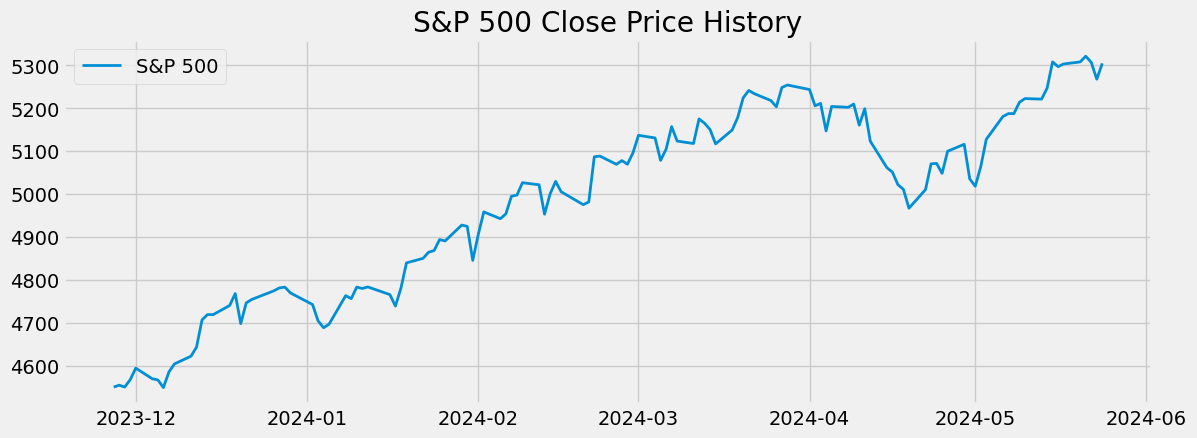

In [84]:
#Plotting of daily stock price data within the last 6 months
hist_6mo = stock_data.history(period="6mo")
plt.figure(figsize = (12.5, 4.5))
plt.plot(hist_6mo['Close'], label = stock_name, linewidth = 2)
plt.title(stock_name + ' Close Price History')
plt.legend(loc='upper left')
plt.show()

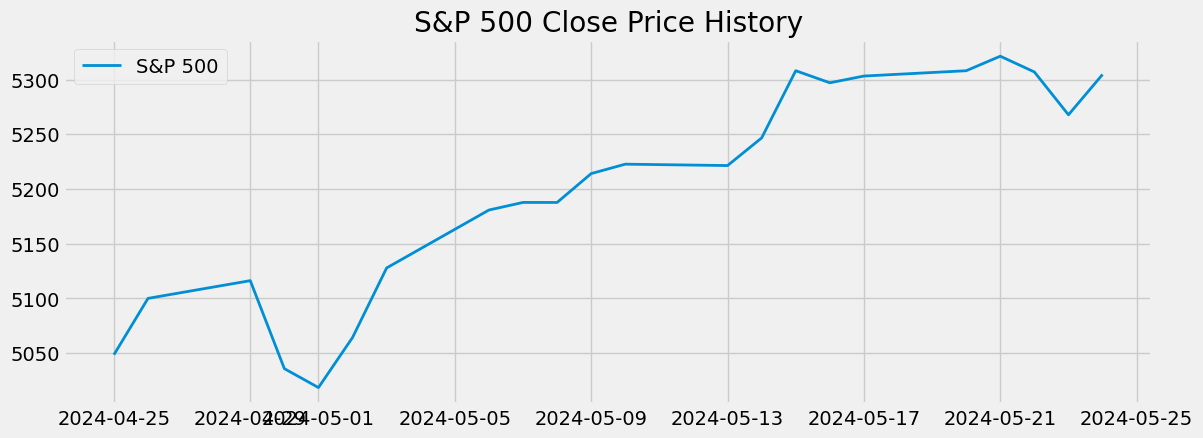

In [85]:
#Plotting of daily stock price data within the last 1 month
hist_1mo = stock_data.history(period="1mo")
plt.figure(figsize = (12.5, 4.5))
plt.plot(hist_1mo['Close'], label = stock_name, linewidth = 2)
plt.title(stock_name + ' Close Price History')
plt.legend(loc='upper left')
plt.show()

In [86]:
#Calculate the stock price and SMA30 & SMA90 within the last 2 years
hist = stock_data.history(period="2y")
SMA30 = pd.DataFrame()
SMA30['Close'] = hist['Close'].rolling(window = 30).mean()
SMA90 = pd.DataFrame()
SMA90['Close'] = hist['Close'].rolling(window = 90).mean()

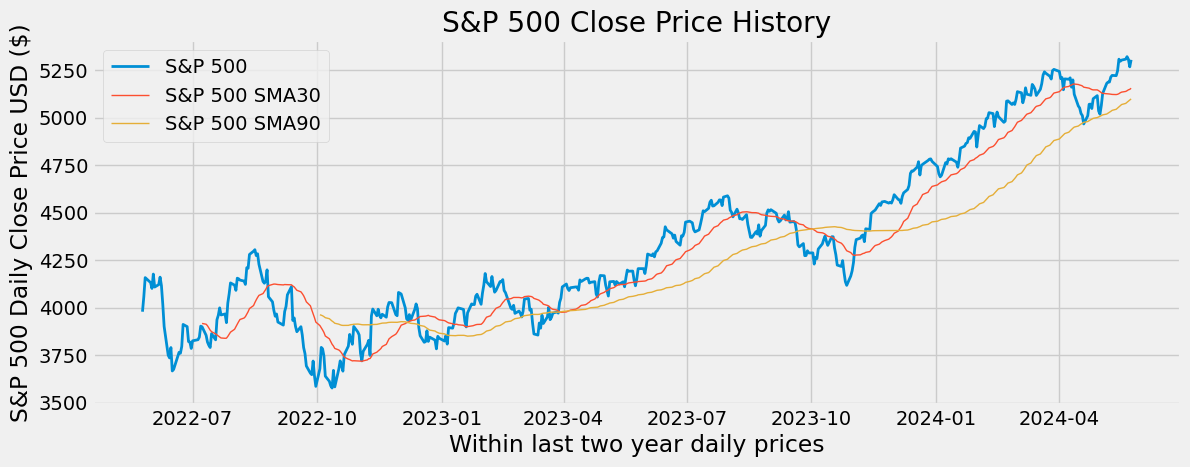

In [87]:
#Visualise SMA30 and SMA90 with Close price data for the last 2 years
plt.figure(figsize = (12.5, 4.5))
plt.plot(hist['Close'], label = stock_name, linewidth = 2)
plt.plot(SMA30['Close'], label = stock_name + " SMA30", linewidth = 1)
plt.plot(SMA90['Close'], label = stock_name + " SMA90", linewidth = 1)
plt.title(stock_name + ' Close Price History')
plt.xlabel('Within last two year daily prices')
plt.ylabel(stock_name + ' Daily Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [88]:
#Create new data frame to store all the data
data = pd.DataFrame()
data[stock_name] = hist['Close']
data['SMA30'] = SMA30['Close']
data['SMA90'] = SMA90['Close']
data

,S&P 500,SMA30,SMA90
Date,,,
2022-05-25 00:00:00-04:00,3978.729980,NaN,NaN
2022-05-26 00:00:00-04:00,4057.840088,NaN,NaN
2022-05-27 00:00:00-04:00,4158.240234,NaN,NaN
2022-05-31 00:00:00-04:00,4132.149902,NaN,NaN
2022-06-01 00:00:00-04:00,4101.229980,NaN,NaN
...,...,...,...
2024-05-20 00:00:00-04:00,5308.129883,5138.261035,5075.231006
2024-05-21 00:00:00-04:00,5321.410156,5141.977702,5081.244005
2024-05-22 00:00:00-04:00,5307.009766,5146.856689,5087.057113


In [89]:
#Create a function for buy and sell signal
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  trade = 0 #variable to signify if user is in a long/short trade
  stock = stock_name

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA90'][i] and trade == 0:
      sigPriceBuy.append(data[stock][i])
      sigPriceSell.append(np.nan)
      trade = 1
    elif data['SMA30'][i] < data['SMA90'][i] and trade == 1:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data[stock][i])
      trade = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [90]:
buy_sell_arr = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_arr[0]
data['Sell_Signal_Price'] = buy_sell_arr[1]
data

,S&P 500,SMA30,SMA90,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2022-05-25 00:00:00-04:00,3978.729980,NaN,NaN,NaN,NaN
2022-05-26 00:00:00-04:00,4057.840088,NaN,NaN,NaN,NaN
2022-05-27 00:00:00-04:00,4158.240234,NaN,NaN,NaN,NaN
2022-05-31 00:00:00-04:00,4132.149902,NaN,NaN,NaN,NaN
2022-06-01 00:00:00-04:00,4101.229980,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-05-20 00:00:00-04:00,5308.129883,5138.261035,5075.231006,NaN,NaN
2024-05-21 00:00:00-04:00,5321.410156,5141.977702,5081.244005,NaN,NaN
2024-05-22 00:00:00-04:00,5307.009766,5146.856689,5087.057113,NaN,NaN


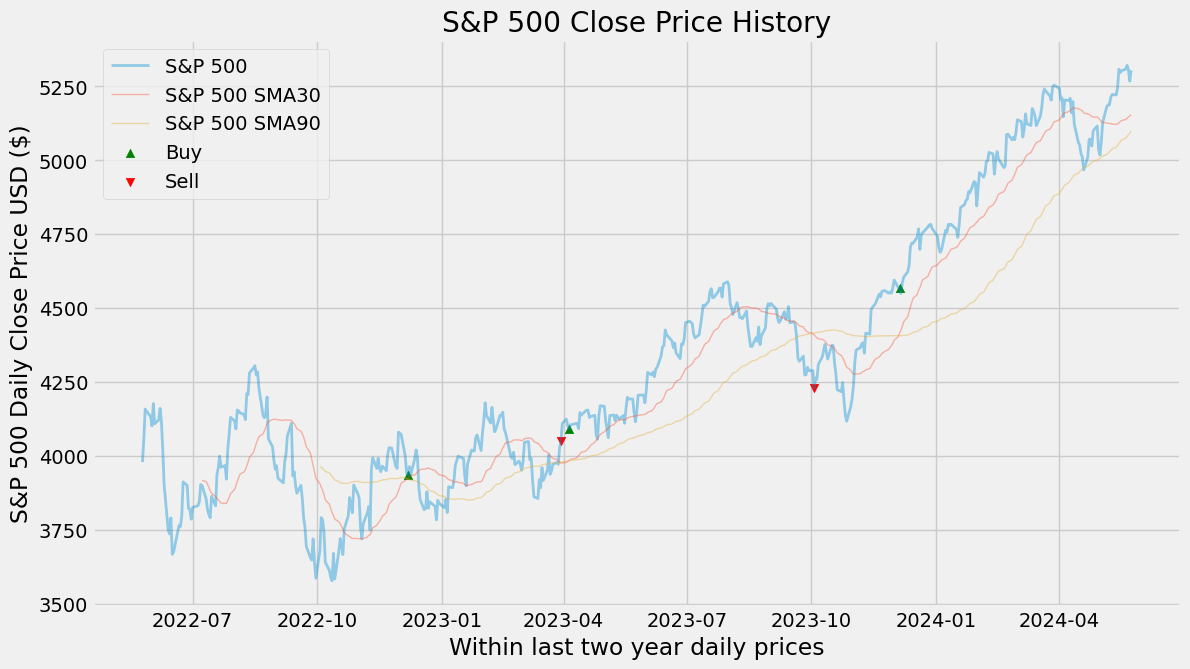

In [91]:
#Visualise SMA30 and SMA90 with Adj. Close price data and Buy & Sell Signals
plt.figure(figsize = (12.5, 7))
plt.plot(data[stock_name], label = stock_name, alpha = 0.40, linewidth = 2)
plt.plot(data['SMA30'], label = stock_name + " SMA30", alpha = 0.40, linewidth = 1)
plt.plot(data['SMA90'], label = stock_name + " SMA90", alpha = 0.40, linewidth = 1)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title(stock_name + ' Close Price History')
plt.xlabel('Within last two year daily prices')
plt.ylabel(stock_name + ' Daily Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()